In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [24]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(url=URLs.PETS)

In [26]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [27]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [28]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [30]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_43.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_169.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_124.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_114.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [34]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,miniature_pinscher,japanese_chin,pomeranian,staffordshire_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,american_pit_bull_terrier,keeshond,Persian,american_pit_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

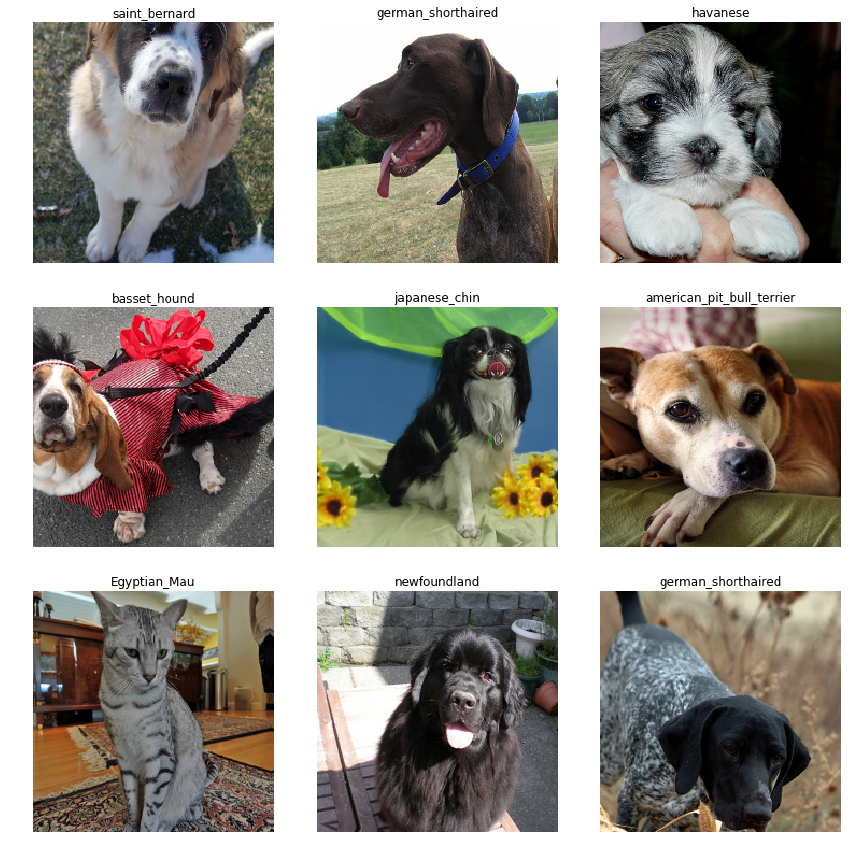

In [35]:
data.show_batch(rows=3,fig_size=(7,6))

In [39]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

<h2>Training Resnet34</h2>

In [44]:
learn = cnn_learner(data, models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 27144962.62it/s]


In [45]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [46]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.391904,0.342790,0.111637,01:26
1,0.547292,0.265303,0.087280,01:29
2,0.343138,0.237945,0.084574,01:31
3,0.259625,0.224092,0.073748,01:30


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

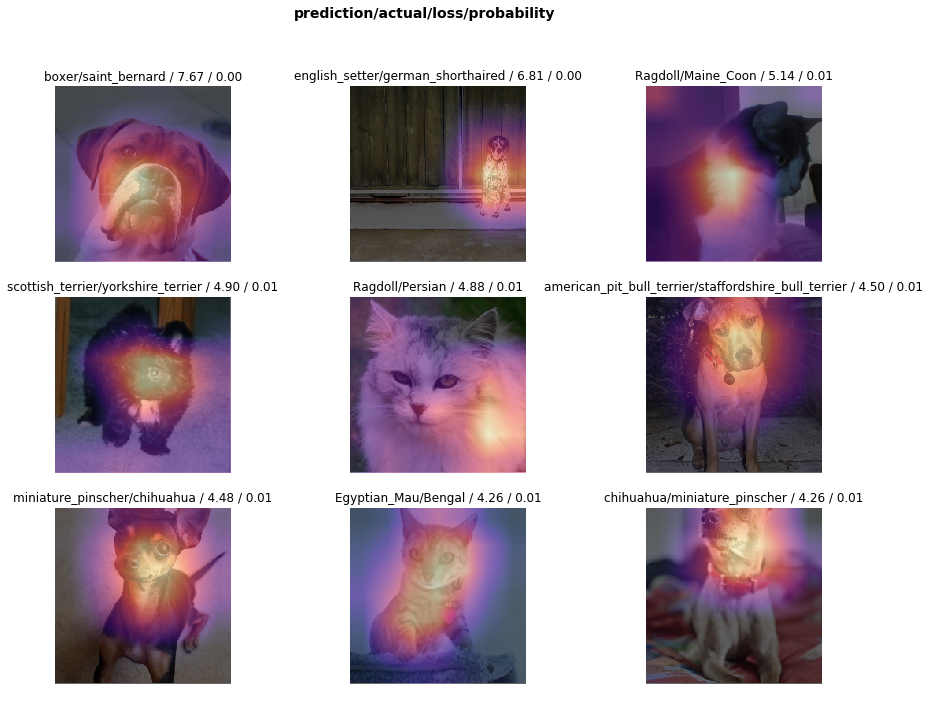

In [50]:
interp.plot_top_losses(9,figsize=(15,11))

In [51]:
doc(interp.plot_top_losses)

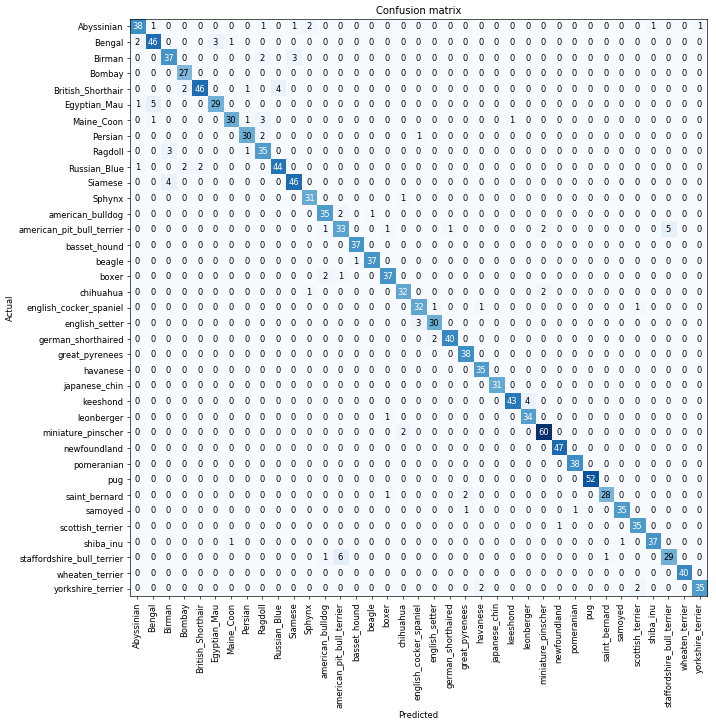

In [53]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [55]:
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Siamese', 'Birman', 4),
 ('keeshond', 'leonberger', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Siamese', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('english_setter', 'english_cocker_spaniel', 3),
 ('Abyssinian', 'Sphynx', 2),
 ('Bengal', 'Abyssinian', 2),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'great_pyrenees', 2),
 ('yorkshire_terrier', 'ha

<h2>Unfreezing, fine-tuning, and learning rates</h2>

In [0]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.512927,0.347614,0.108254,01:34


In [0]:
learn.load('stage-1');

In [67]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


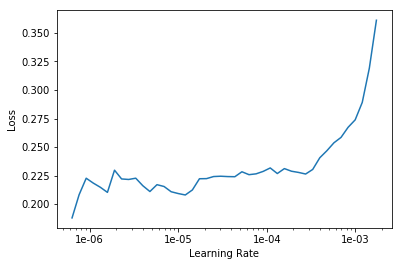

In [68]:
learn.recorder.plot()

In [69]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.231384,0.216372,0.072395,01:33
1,0.223844,0.217417,0.071719,01:31


<h2>Training : Resnet50</h2>

In [0]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=299,bs=32).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


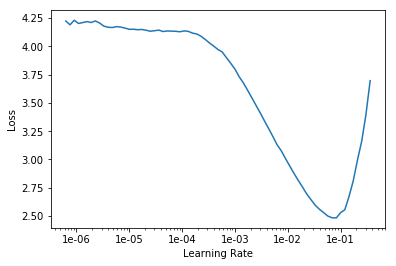

In [83]:
learn.lr_find()
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.709359,0.268032,0.073748,02:24
1,0.409586,0.269030,0.083897,02:23
2,0.346566,0.215943,0.069012,02:26
3,0.260407,0.234369,0.066982,02:26
4,0.217706,0.185347,0.059540,02:24
5,0.145531,0.184501,0.058863,02:24
6,0.120267,0.175311,0.056157,02:24
7,0.089828,0.175708,0.056834,02:25


In [0]:
learn.save('stage-1-50')